# Word Embeddings
**Objective:** The goal from this exercise is to explore the Word2Vec technique for word embeddings and introduce Stanford's GloVe embedding as well. The libraries we will be using are `Gensim` for Word Embeddings Word2Vec and GloVe, `matplotlib` for visualization and `Scikit-Learn` for Principle Component Analysis models which are used for reducing dimensionality.

## Learn Word2Vec Embedding using Gensim

Word2Vec models require a lot of text, e.g. the entire Wikipedia corpus. However, we will demonstrate the principles using a small in-memory example of text.

Each sentence must be tokenized (divided into words and prepared). The sentences could be text loaded into memory, or an iterator that progressively loads text, required for very large text corpora. 

There are many parameters on this constructor:

*   **`size`**: (default 100) The number of dimensions of the embedding, e.g. the length of the dense vector to represent each token (word).
*   **`window`**: (default 5) The maximum distance between a target word and words around the target word.
*   **`min_count`**: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
*   **`workers`**: (default 3) The number of threads to use while training.
*   **`sg`**: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

###Building and training a Word2Vec model

In [1]:
from gensim.models import Word2Vec

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(model)

# summarize vocabulary
words = list(model.wv.vocab)
print(words)

# access vector for one word
print(model['sentence'])

# save model
model.save('model.bin')

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[ 7.5158942e-04  1.9866247e-03  4.3037320e-03 -2.2942934e-03
 -2.7056241e-03  2.4930178e-03  4.2582941e-03 -3.3406736e-03
  3.9816606e-03 -3.6274197e-03 -6.1013497e-04  4.5498116e-03
 -3.6788203e-03 -4.4889218e-04  1.9906703e-03 -1.2030323e-03
  3.3361833e-03 -1.4729829e-03 -9.1718120e-04  4.3649357e-03
 -3.8686933e-03  9.4803330e-04 -2.3377568e-03 -1.4782617e-03
 -2.2342859e-03 -2.4511237e-03  1.5273526e-03 -1.5776055e-03
 -3.5026460e-03 -1.8705421e-03 -3.6564069e-03  2.1271736e-03
  4.8373258e-03  5.2243454e-04 -1.5933661e-03 -3.4697831e-03
 -2.9909697e-03  1.1976418e-03 -4.6624514e-04 -2.3571881e-04
 -2.0204440e-03 -3.9513884e-03 -4.2709247e-03  1.4561350e-03
  3.3177531e-03  1.4354736e-03 -1.9073003e-03  2.4489244e-03
  4.3535051e-03  1.9038571e-03 -1.2367294e-03  4.0158457e-03
 -4.2072502e-03  4.5169923e-03  4.8033618e-0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [2]:
# let's load the model and test it

# load model
new_model = Word2Vec.load('model.bin')
print(new_model['this', 'is'])

[[-2.1991143e-03  3.7960710e-03 -4.0369807e-03  1.1577043e-03
  -4.0820925e-03 -4.0833205e-03 -4.7791195e-03 -3.9703948e-03
  -3.4336431e-03  2.3522251e-03 -3.1668190e-03  1.8395475e-03
   4.0424196e-03 -4.3430122e-05 -4.4311234e-03  3.9424547e-03
  -5.5568868e-05  2.1255270e-03  1.5467384e-03  4.1349642e-03
  -4.5898594e-03 -1.3320318e-03 -3.3389220e-03  4.4765105e-03
   4.4440860e-03 -4.4152825e-03  3.7944205e-03  2.7113763e-04
  -3.2175230e-03  1.7095204e-04 -2.9218122e-03 -5.0963857e-04
  -1.9872561e-03  7.1044051e-04  3.2879484e-03  1.6231658e-03
   2.9446543e-03  4.9892636e-03 -3.8320089e-03 -3.9080614e-03
  -1.1536730e-03  7.5945025e-04 -8.2065130e-04 -4.4791745e-03
  -9.6785123e-05 -1.1752327e-03  1.0739954e-03 -1.2911134e-03
   1.1829174e-03 -1.6130751e-03  2.5774525e-03  3.9406575e-04
  -3.2016146e-03 -2.1461521e-03  3.4631842e-03 -2.8722491e-03
   3.1955151e-03  4.4184965e-03  4.7116680e-03  1.7216355e-03
  -1.0477053e-03 -1.9837243e-03  3.0026024e-03  3.7396187e-03
   2.842

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


### Visualize Word Embedding

After learning the word embedding for the text, it's nice to explore it with visualization. We can use classical projection methods to reduce the high-dimensional word vectors to two- dimensional plots and plot them on a graph. The visualizations can provide a qualitative diagnostic for our learned model.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


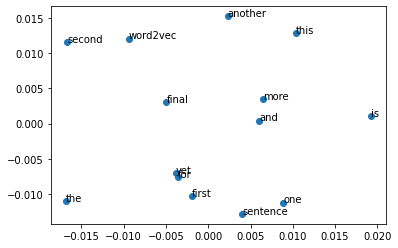

In [3]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

# train model
model = Word2Vec(sentences, min_count=1)

# fit a 2D PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2) 				#reduce dimensionality to 2D
result = pca.fit_transform(X) 		#2D model to plot

# create a scatter plot of the projection
# pull out the 2 dimensions as x and y
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

# annotate the points on the graph with the words themselves
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## Google Word2Vec 

Instead of training your own word vectors (which requires a lot of RAM and compute power), you can simply use a pre-trained word embedding. Google has published a pre-trained Word2Vec model that was trained on Google news data (about 100 billion words). It contains 3 million words and phrases and was fit using 300-dimensional word vectors. It is a 1.53 Gigabyte file.

In [4]:
# download Google's word embeddings
!wget "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz" -O "GoogleNews-vectors-negative300.bin.gz" 

# unzip downloaded word embeddings
!gunzip GoogleNews-vectors-negative300.bin.gz  

# list files in current directoty
!ls -lah  

--2021-01-27 10:51:05--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.200.5
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.200.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G   100MB/s    in 16s     

2021-01-27 10:51:22 (95.7 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]

total 3.4G
drwxr-xr-x 1 root root 4.0K Jan 27 10:52 .
drwxr-xr-x 1 root root 4.0K Jan 27 10:45 ..
drwxr-xr-x 1 root root 4.0K Jan 20 17:27 .config
-rw-r--r-- 1 root root 3.4G Mar  5  2015 GoogleNews-vectors-negative300.bin
-rw-r--r-- 1 root root  22K Jan 27 10:51 model.bin
drwxr-xr-x 1 root root 4.0K Jan 20 17:27 sample_data


In [5]:
from gensim.models import KeyedVectors

# load the google word2vec model
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

#### Let's have fun

In [6]:
# get word vector
model['airplane']

array([ 0.16894531, -0.20019531, -0.16113281,  0.11669922, -0.16015625,
       -0.35742188, -0.17480469, -0.17773438,  0.453125  ,  0.01855469,
        0.25195312, -0.31640625,  0.24121094, -0.2890625 , -0.11523438,
        0.37109375,  0.01293945,  0.16796875,  0.0625    ,  0.07714844,
       -0.04492188, -0.00546265, -0.03588867, -0.22949219,  0.0055542 ,
        0.02612305, -0.12988281,  0.07568359,  0.13769531,  0.03808594,
       -0.27929688, -0.28710938, -0.25976562,  0.0480957 ,  0.02209473,
        0.0859375 , -0.00921631,  0.12597656,  0.05957031,  0.2890625 ,
        0.07421875,  0.06225586,  0.28515625,  0.07275391, -0.02124023,
       -0.27929688,  0.10302734,  0.03759766,  0.33203125, -0.125     ,
       -0.265625  ,  0.1484375 ,  0.11962891, -0.04370117, -0.125     ,
       -0.203125  ,  0.18554688, -0.07470703,  0.25      ,  0.08398438,
        0.26953125, -0.31640625, -0.26171875,  0.03759766,  0.10693359,
        0.02600098, -0.06689453,  0.06640625, -0.0378418 ,  0.05

In [7]:
# get most similar words
model.most_similar('great')

[('terrific', 0.7989331483840942),
 ('fantastic', 0.7935211658477783),
 ('tremendous', 0.7748856544494629),
 ('wonderful', 0.7647868394851685),
 ('good', 0.7291510105133057),
 ('incredible', 0.7032873630523682),
 ('marvelous', 0.6971102952957153),
 ('phenomenal', 0.6841565370559692),
 ('amazing', 0.6634128093719482),
 ('awesome', 0.6510506868362427)]

In [8]:
# queen = (king - man) + woman
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118192911148071)]


In [9]:
# (france - paris) + spain = ?
result = model.most_similar(positive=["paris","spain"], negative=["france"], topn=1)
print(result)

[('madrid', 0.5295541286468506)]


In [10]:
model.doesnt_match(["red", "blue", "car", "orange"])


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'car'

## Stanford’s GloVe Embedding

Like Word2Vec, the GloVe researchers also provide pre-trained word vectors. Let's download the smallest GloVe pre-trained model from the GloVe website. It's a 822 Megabyte zip file with 4 different models (50, 100, 200 and 300-dimensional vectors) trained on Wikipedia data with 6 billion tokens and a 400,000 word vocabulary.

In [11]:
# download 
!wget http://nlp.stanford.edu/data/glove.6B.zip 

# unzip downloaded word embeddings
!unzip glove.6B.zip  

# list files in current directoty
!ls -lah  


--2021-01-27 10:53:19--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-01-27 10:53:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-01-27 10:53:20--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [12]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# convert the 100-dimensional version of the glove model to word2vec format
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

# load the converted model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [13]:
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]
